In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/becodeorg/GNT-Arai-2.31/master/content/additional_resources/datasets/Wine%20Quality/wine.csv?token=AUDYSCOBCKJXVFIIH6ZCD4TBIBH2E"
df = pd.read_csv(url)

df = df.iloc[: , 1:]
df.quality = df.quality.astype(np.float64)

df.head()
df.info()
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB


(6497, 12)

In [4]:

X = df.drop(['quality'],axis=1).values
y = df['quality'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)



In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4872, 11)
(1625, 11)
(4872,)
(1625,)


In [6]:
# nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['quality']))
nb_features= X_train.shape[1]
batch_size = 1

In [8]:
model = Sequential()
model.add(Dense(100, input_shape=(11,), activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100))

In [22]:
learning_rate = 0.0001
loss = "sparse_categorical_crossentropy"
model.compile(optimizer="adam", loss=loss, metrics=['accuracy'])


quality = model.fit(X_train, y_train, epochs=30, validation_split = 0.2, verbose=2)

Epoch 1/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 2/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 3/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 4/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 5/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 6/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 7/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 8/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 9/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364
Epoch 10/30
122/122 - 0s - loss: 9.0540 - accuracy: 0.3364 - val_loss: 8.9871 - val_accuracy: 0.3364

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
Total params: 21,400
Trainable params: 21,400
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(quality.params)
print(quality.history.keys())

{'verbose': 2, 'epochs': 30, 'steps': 122}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


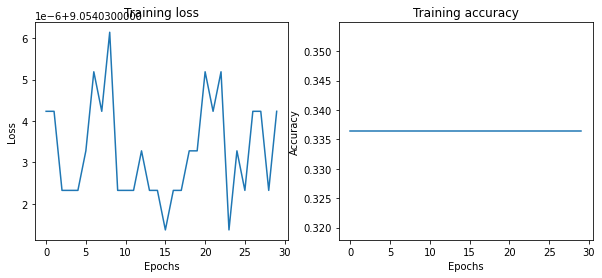

<Figure size 432x288 with 0 Axes>

In [31]:
loss = quality.history['loss']
accuracy = quality.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()
plt.savefig('visuals/loss_accuracy_v1.png')

In [26]:
predictions = model.predict(X_test)

results = model.evaluate(X_test, y_test)
print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

51/51 [==============================] - 0s 664us/step - loss: 9.0566 - accuracy: 0.3268

Accuracy on test set is 32.68%
